<a href="https://colab.research.google.com/github/MohamedMukhtar89CN/MMukhtar_Ibrahim-_app/blob/main/FINAL_Project_Model_of_Loan_Approval_Prediction_DS410_M_Mukhtar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/Loan approval prediction (1).csv')

In [ ]:
df = pd.read_csv('/content/Loan approval prediction (1).csv')
print(df.iloc[0])

id                                    0
person_age                           37
person_income                     35000
person_home_ownership              RENT
person_emp_length                     0
loan_intent                   EDUCATION
loan_grade                            B
loan_amnt                          6000
loan_int_rate                     11.49
loan_percent_income                0.17
cb_person_default_on_file             N
cb_person_cred_hist_length           14
loan_status                           0
Name: 0, dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  int64  
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(2), int64(7), object

In [ ]:
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()

In [ ]:
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


                                  id  person_age  person_income  \
id                          1.000000    0.008608      -0.001896   
person_age                  0.008608    1.000000       0.102176   
person_income              -0.001896    0.102176       1.000000   
person_emp_length           0.005376    0.121276       0.164042   
loan_amnt                  -0.000403    0.050378       0.310942   
loan_int_rate              -0.003454    0.009653      -0.057611   
loan_percent_income        -0.002677   -0.031975      -0.280314   
cb_person_cred_hist_length  0.008139    0.874260       0.082727   
loan_status                -0.008138   -0.001130      -0.169956   

                            person_emp_length  loan_amnt  loan_int_rate  \
id                                   0.005376  -0.000403      -0.003454   
person_age                           0.121276   0.050378       0.009653   
person_income                        0.164042   0.310942      -0.057611   
person_emp_length            

In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

df_encoded = df.copy()

label_encoder = LabelEncoder()
for column in categorical_columns:
    df["cb_person_cred_hist_length"] = label_encoder.fit_transform(df["cb_person_cred_hist_length"])
    df["person_home_ownership"] = label_encoder.fit_transform(df["person_home_ownership"])
    df["loan_int_rate"] = label_encoder.fit_transform(df["loan_int_rate"])
    df["loan_grade"] = label_encoder.fit_transform(df["loan_grade"])
    df["cb_person_default_on_file"] = label_encoder.fit_transform(df["cb_person_default_on_file"])

features = ["person_age", "person_income", "person_home_ownership",
       "person_emp_length", "loan_intent", "loan_grade", "loan_amnt",
       "loan_int_rate", "loan_percent_income", "cb_person_default_on_file",
       "cb_person_cred_hist_length", "loan_status"]
scaler = StandardScaler()
df_encoded[features] = scaler.fit_transform(df_encoded[features])

df_encoded["loan_status_Log"] = np.log1p(df_encoded["loan_status"])

df_encoded.head(20)

NameError: name 'categorical_columns' is not defined

In [19]:
df = pd.read_csv('/content/Loan approval prediction (1).csv')
categorical_columns = ['person_home_ownership',
       'loan_intent', 'loan_grade', 'cb_person_default_on_file']
label_encoder = LabelEncoder()
for column in categorical_columns:
    df['cb_person_cred_hist_length'] = label_encoder.fit_transform(df['cb_person_cred_hist_length'])
    df['person_home_ownership'] = label_encoder.fit_transform(df['person_home_ownership'])
    df['loan_intent'] = label_encoder.fit_transform(df['loan_intent'])
    df['loan_grade'] = label_encoder.fit_transform(df['loan_grade'])
    df['cb_person_default_on_file'] = label_encoder.fit_transform(df['cb_person_default_on_file'])


In [20]:

# Inspect the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())


   id  person_age  person_income  person_home_ownership  person_emp_length  \
0   0          37          35000                      2                  0   
1   1          22          56000                      1                  6   
2   2          29          28800                      1                  8   
3   3          30          70000                      2                 14   
4   4          22          60000                      2                  2   

   loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0            1           1       6000          11.49                 0.17   
1            3           2       4000          13.35                 0.07   
2            4           0       6000           8.90                 0.21   
3            5           1      12000          11.11                 0.17   
4            3           0       6000           6.92                 0.10   

   cb_person_default_on_file  cb_person_cred_hist_length  loan_statu

In [10]:
df.head(15)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,2,0,1,1,6000,11.49,0.17,0,12,0
1,1,22,56000,1,6,3,2,4000,13.35,0.07,0,0,0
2,2,29,28800,1,8,4,0,6000,8.90,0.21,0,8,0
3,3,30,70000,2,14,5,1,12000,11.11,0.17,0,3,0
4,4,22,60000,2,2,3,0,6000,6.92,0.10,0,1,0
5,5,27,45000,2,2,5,0,9000,8.94,0.20,0,3,0
6,6,25,45000,0,9,1,0,12000,6.54,0.27,0,1,0
7,7,21,20000,2,0,4,2,2500,13.49,0.13,1,1,0
8,8,37,69600,2,11,1,3,5000,14.84,0.07,1,9,0
9,9,35,110000,0,0,0,2,15000,12.98,0.14,1,4,0


In [21]:
df.drop('id', axis=1, inplace=True)

In [22]:
df.fillna(df.mean(), inplace=True)


In [11]:
df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

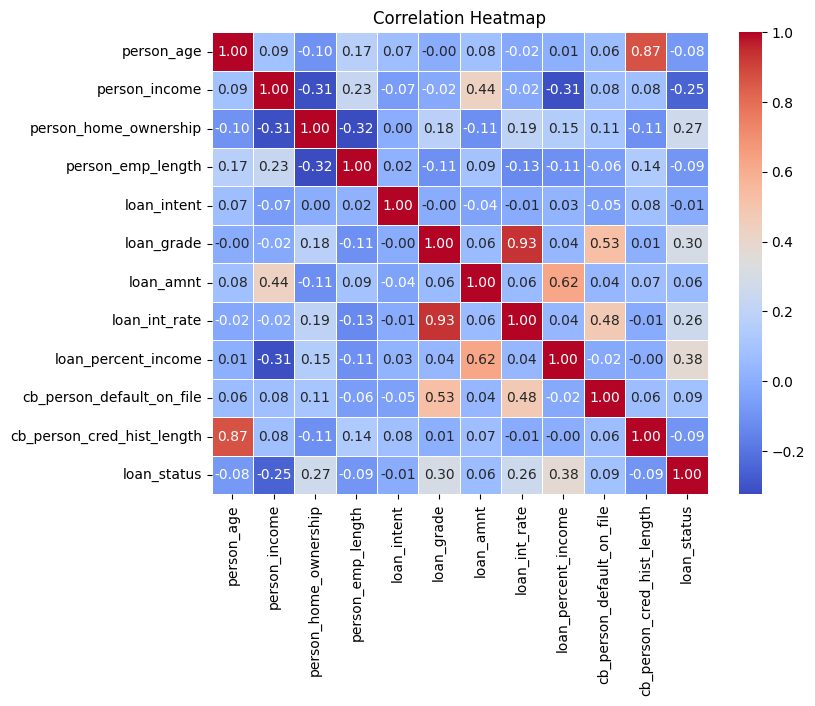

In [23]:
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# Display the heatmap
plt.title("Correlation Heatmap")
plt.show()

In [24]:
categorical_columns = ["person_home_ownership",
       "loan_int_rate", "loan_grade", "cb_person_cred_hist_length"]

## Encoding of categorical columns

In [25]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

df_encoded = df.copy()

label_encoder = LabelEncoder()
for column in categorical_columns:
    df["cb_person_cred_hist_length"] = label_encoder.fit_transform(df["cb_person_cred_hist_length"])
    df["person_home_ownership"] = label_encoder.fit_transform(df["person_home_ownership"])
    df["loan_int_rate"] = label_encoder.fit_transform(df["loan_int_rate"])
    df["loan_grade"] = label_encoder.fit_transform(df["loan_grade"])
    df["cb_person_default_on_file"] = label_encoder.fit_transform(df["cb_person_default_on_file"])

features = ["person_age", "person_income", "person_home_ownership",
       "person_emp_length", "loan_intent", "loan_grade", "loan_amnt",
       "loan_int_rate", "loan_percent_income", "cb_person_default_on_file",
       "cb_person_cred_hist_length", "loan_status"]
scaler = StandardScaler()
df_encoded[features] = scaler.fit_transform(df_encoded[features])

df_encoded["loan_status_Log"] = np.log1p(df_encoded["loan_status"])

df_encoded.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,loan_status_Log
0,1.595144,-0.978016,0.969727,-1.181232,-0.895525,-0.068799,-0.604918,0.258160,0.145506,-0.411461,2.157932,-0.385433,-0.486838
1,-0.915850,-0.280431,-0.065981,0.272160,0.259847,0.894384,-0.967709,0.890083,-0.993045,-0.411461,-0.962986,-0.385433,-0.486838
2,0.255947,-1.183970,-0.065981,0.756624,0.837533,-1.031982,-0.604918,-0.621777,0.600926,-0.411461,1.117626,-0.385433,-0.486838
3,0.423346,0.184626,0.969727,2.210016,1.415219,-0.068799,0.483456,0.129057,0.145506,-0.411461,-0.182756,-0.385433,-0.486838
4,-0.915850,-0.147558,0.969727,-0.696768,0.259847,-1.031982,-0.604918,-1.294471,-0.651479,-0.411461,-0.702909,-0.385433,-0.486838


In [26]:
df.dtypes

,0
person_age,int64
person_income,int64
person_home_ownership,int64
person_emp_length,int64
loan_intent,int64
loan_grade,int64
loan_amnt,int64
loan_int_rate,int64
loan_percent_income,float64
cb_person_default_on_file,int64


In [27]:
# Scale numerical features for better clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['person_home_ownership',
       'loan_intent', 'loan_grade', 'cb_person_default_on_file']])

df_scaled = pd.DataFrame(scaled_features, columns=['person_home_ownership',
       'loan_intent', 'loan_grade', 'cb_person_default_on_file'])

In [28]:
df.head(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,2,0,1,1,6000,64,0.17,0,12,0
1,22,56000,1,6,3,2,4000,89,0.07,0,0,0
2,29,28800,1,8,4,0,6000,26,0.21,0,8,0


In [29]:
df.info

<bound method DataFrame.info of      person_age  person_income  person_home_ownership  person_emp_length  \
0            37          35000                      2                  0   
1            22          56000                      1                  6   
2            29          28800                      1                  8   
3            30          70000                      2                 14   
4            22          60000                      2                  2   
..          ...            ...                    ...                ...   
513          39         160000                      0                  8   
514          24          35000                      2                  0   
515          30          54792                      2                  0   
516          22          31200                      2                  4   
517          26          58000                      0                  2   

     loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0              1           1       6000             64                 0.17   
1              3           2       4000             89                 0.07   
2              4           0       6000             26                 0.21   
3              5           1      12000             54                 0.17   
4              3           0       6000             10                 0.10   
..           ...         ...        ...            ...                  ...   
513            5           0      15000             20                 0.09   
514            3           2       8000             98                 0.23   
515            0           2       5000             94                 0.09   
516            4           1       6000             37                 0.19   
517            5           2      13000             85                 0.23   

     cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
0                            0                          12            0  
1                            0                           0            0  
2                            0                           8            0  
3                            0                           3            0  
4                            0                           1            0  
..                         ...                         ...          ...  
513                          0                           9            0  
514                          0                           1            0  
515                          1                           4            0  
516                          0                           0            0  
517                          0                           0            0  

[518 rows x 12 columns]>

In [30]:
df.describe()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,27.471042,64442.054054,1.063707,4.876448,2.550193,1.071429,9334.797297,54.418919,0.157220,0.144788,3.702703,0.129344
std,5.979505,30132.953376,0.966456,4.132265,1.732718,1.039228,5518.139097,36.927659,0.087916,0.352227,3.848740,0.335904
min,21.000000,18000.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,0.010000,0.000000,0.000000,0.000000
25%,23.000000,42000.000000,0.000000,2.000000,1.000000,0.000000,5000.000000,21.000000,0.090000,0.000000,1.000000,0.000000
50%,26.000000,60000.000000,1.500000,4.000000,3.000000,1.000000,8000.000000,53.000000,0.140000,0.000000,2.000000,0.000000
75%,29.000000,78000.000000,2.000000,7.000000,4.000000,2.000000,12000.000000,79.750000,0.200000,0.000000,6.000000,0.000000
max,56.000000,225000.000000,2.000000,21.000000,5.000000,5.000000,35000.000000,137.000000,0.500000,1.000000,17.000000,1.000000


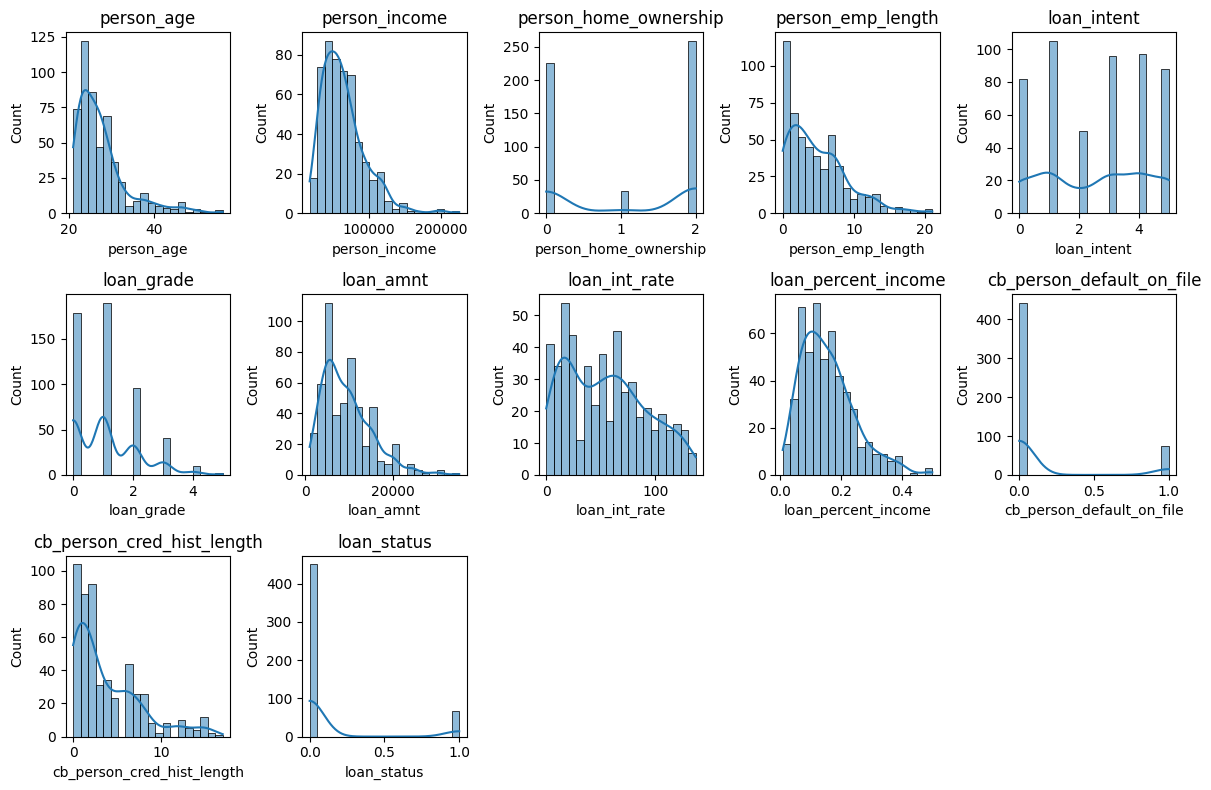

In [31]:
# Data Distribution
numerical_features = ['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status']


plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

# Manage outliers

In [32]:
df.describe()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,27.471042,64442.054054,1.063707,4.876448,2.550193,1.071429,9334.797297,54.418919,0.157220,0.144788,3.702703,0.129344
std,5.979505,30132.953376,0.966456,4.132265,1.732718,1.039228,5518.139097,36.927659,0.087916,0.352227,3.848740,0.335904
min,21.000000,18000.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,0.010000,0.000000,0.000000,0.000000
25%,23.000000,42000.000000,0.000000,2.000000,1.000000,0.000000,5000.000000,21.000000,0.090000,0.000000,1.000000,0.000000
50%,26.000000,60000.000000,1.500000,4.000000,3.000000,1.000000,8000.000000,53.000000,0.140000,0.000000,2.000000,0.000000
75%,29.000000,78000.000000,2.000000,7.000000,4.000000,2.000000,12000.000000,79.750000,0.200000,0.000000,6.000000,0.000000
max,56.000000,225000.000000,2.000000,21.000000,5.000000,5.000000,35000.000000,137.000000,0.500000,1.000000,17.000000,1.000000


In [33]:
categorical_columns = ['person_home_ownership',
       'loan_intent', 'loan_grade', 'cb_person_default_on_file']
label_encoder = LabelEncoder()
for column in categorical_columns:

    df['person_home_ownership'] = label_encoder.fit_transform(df['person_home_ownership'])
    df['loan_intent'] = label_encoder.fit_transform(df['loan_intent'])
    df['loan_grade'] = label_encoder.fit_transform(df['loan_grade'])
    df['cb_person_default_on_file'] = label_encoder.fit_transform(df['cb_person_default_on_file'])

    # Smooth outliers using a rolling median
df["person_age"] = df["person_age"].rolling(window=5, center=True).median()
df["person_emp_length"] = df["person_emp_length"].rolling(window=5, center=True).median()
df["loan_percent_income"] = df["loan_percent_income"].rolling(window=5, center=True).median()
df["cb_person_cred_hist_length"] = df["cb_person_cred_hist_length"].rolling(window=5, center=True).median()
df["loan_int_rate"] = df["loan_int_rate"].rolling(window=5, center=True).median()

df.fillna(df.mean(), inplace=True)

# Save the smoothed dataset
df.to_csv("Smoothed_data.csv", index=False)
print("Outliers have been smoothed and saved as 'Smoothed_data.csv'.")

Outliers have been smoothed and saved as 'Smoothed_data.csv'.


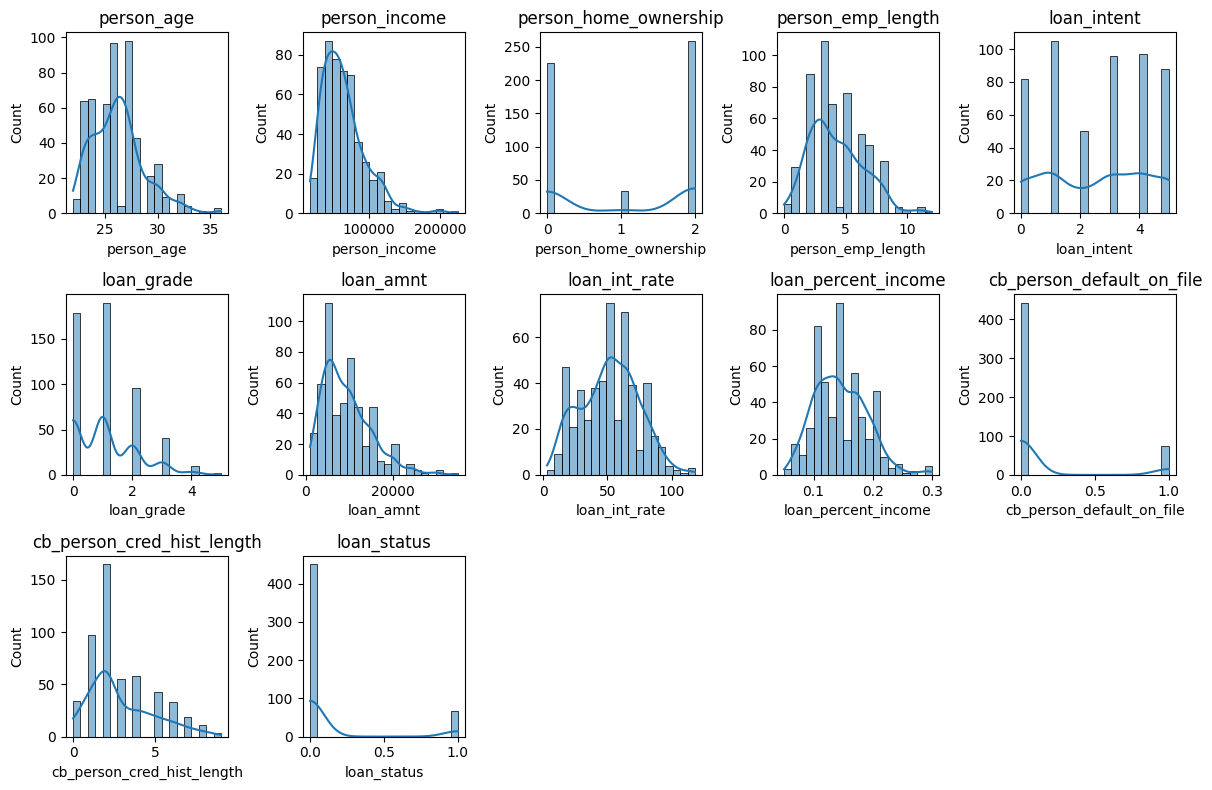

In [34]:
# Data Distribution
numerical_features = ['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status']


plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

In [35]:
df = pd.read_csv('/content/Smoothed_data.csv')


df.head(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,26.233463,35000,2,4.212062,1,1,6000,51.86965,0.145447,0,2.865759,0
1,26.233463,56000,1,4.212062,3,2,4000,51.86965,0.145447,0,2.865759,0
2,29.000000,28800,1,6.000000,4,0,6000,54.00000,0.170000,0,3.000000,0


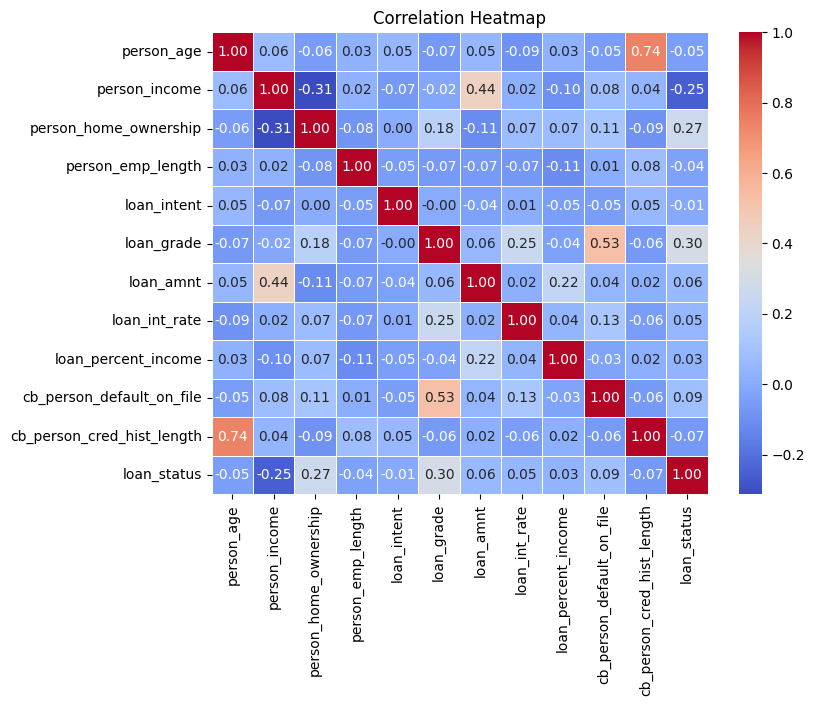

In [36]:
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Display the heatmap
plt.title("Correlation Heatmap")
plt.show()

# Model creation

In [37]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [38]:
df.dtypes

,0
person_age,float64
person_income,int64
person_home_ownership,int64
person_emp_length,float64
loan_intent,int64
loan_grade,int64
loan_amnt,int64
loan_int_rate,float64
loan_percent_income,float64
cb_person_default_on_file,int64


In [39]:
df.head(20)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,26.233463,35000,2,4.212062,1,1,6000,51.86965,0.145447,0,2.865759,0
1,26.233463,56000,1,4.212062,3,2,4000,51.86965,0.145447,0,2.865759,0
2,29.000000,28800,1,6.000000,4,0,6000,54.00000,0.170000,0,3.000000,0
3,27.000000,70000,2,6.000000,5,1,12000,27.00000,0.170000,0,3.000000,0
4,27.000000,60000,2,8.000000,3,0,6000,26.00000,0.200000,0,3.000000,0
5,25.000000,45000,2,2.000000,5,0,9000,27.00000,0.170000,0,1.000000,0
6,25.000000,45000,0,2.000000,1,0,12000,27.00000,0.130000,0,1.000000,0
7,27.000000,20000,2,2.000000,4,2,2500,82.00000,0.140000,1,3.000000,0
8,30.000000,69600,2,5.000000,1,3,5000,82.00000,0.140000,1,3.000000,0
9,30.000000,110000,0,5.000000,0,2,15000,82.00000,0.140000,1,3.000000,0


In [40]:
# Split data
# smoothed_data.csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

features = ["person_age", "person_income", "person_home_ownership",
       "person_emp_length", "loan_intent", "loan_grade", "loan_amnt",
       "loan_int_rate", "loan_percent_income", "cb_person_default_on_file",
       "cb_person_cred_hist_length"]

X = df_encoded[features]
y = df_encoded["loan_status"]


# Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, objective="reg:squarederror")
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_log = model.predict(X_test)
    y_pred = np.expm1(y_pred_log)
    y_test_original = np.expm1(y_test)
    mae = mean_absolute_error(y_test_original, y_pred)

    results[name] = mae
    print(f"{name} - MAE: {mae:.4f}")


best_model = min(results, key=results.get)
print(f" Best Model: {best_model}  MAE = {results[best_model]:.4f}")

Linear Regression - MAE: 1.9119
Random Forest - MAE: 1.3473
XGBoost - MAE: 1.5459
 Best Model: Random Forest  MAE = 1.3473


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
classification_features_full = features

X_full = df_encoded[classification_features_full]
y_full = df["loan_status"]

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42
)

classification_models_full = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric="logloss")
}

classification_results_full = {}

for name, model in classification_models_full.items():
    model.fit(X_train_full, y_train_full)
    y_pred_full = model.predict(X_test_full)

    accuracy = accuracy_score(y_test_full, y_pred_full)
    f1 = f1_score(y_test_full, y_pred_full)

    classification_results_full[name] = {"Accuracy": accuracy, "F1-Score": f1}

    print(f"{name} - Accuracy: {accuracy:.4f},")


best_classification_model_full = max(classification_results_full, key=lambda k: classification_results_full[k]["F1-Score"])
print(f" Best Classification Model: {best_classification_model_full} ")

Logistic Regression - Accuracy: 0.9038,
Random Forest - Accuracy: 0.9423,
XGBoost - Accuracy: 0.9423,
 Best Classification Model: XGBoost 


In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error

# Load the dataset
df = pd.read_csv("/content/Loan approval prediction (1).csv")

# Drop unnecessary columns
df.drop(columns=["id"], inplace=True)

# Encode categorical variables
categorical_columns = ["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Define features and target
features = ["person_age", "person_income", "person_home_ownership",
            "person_emp_length", "loan_intent", "loan_grade", "loan_amnt",
            "loan_int_rate", "loan_percent_income", "cb_person_default_on_file",
            "cb_person_cred_hist_length"]

X_loan_approval = df[features]
y_loan_approval = np.log1p(df["loan_status"])  # Log-transform for regression

# Split dataset
X_train_loan_approval, X_test_loan_approval, y_train_loan_approval, y_test_loan_approval = train_test_split(
    X_loan_approval, y_loan_approval, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_loan_approval = scaler.fit_transform(X_train_loan_approval)
X_test_loan_approval = scaler.transform(X_test_loan_approval)

# Train the regression model
loan_approval_model = LinearRegression()
loan_approval_model.fit(X_train_loan_approval, y_train_loan_approval)

# Predict loan status
y_pred_loan_approval_log = loan_approval_model.predict(X_test_loan_approval)
y_pred_loan_approval = np.expm1(y_pred_loan_approval_log)  # Undo log transformation

loan_approval_mae = mean_absolute_error(np.expm1(y_test_loan_approval), y_pred_loan_approval)

# Store predictions correctly
df["Predicted_Loan_Approval_Status"] = np.nan
df.loc[X_test_loan_approval[:, 0].argsort(), "Predicted_Loan_Approval_Status"] = y_pred_loan_approval

# Train a classification model
X_classification = df[features]  # Use original target variable for classification
y_classification = df["loan_status"]

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42)

classification_model = RandomForestClassifier(n_estimators=100, random_state=42)
classification_model.fit(X_train_class, y_train_class)

# Predict classification outcome
y_pred_class = classification_model.predict(X_test_class)
classification_accuracy = accuracy_score(y_test_class, y_pred_class)

# Predict Classification Outcome with Probabilities
id_class_proba = classification_model.predict_proba(X_test_class)[:, 1]
# Probability of approval


#
# Define a threshold for approval decision
approval_threshold = 0.5  # Adjust based on business rules

print(f"id Loan Approval MAE: {loan_approval_mae}")
print(f"id Classification Probability: {id_class_proba[0]:.2f}")
print(f"id Classification Prediction: {'Approved' if id_class_proba[0] >= approval_threshold else 'Disapproved'}")


id Loan Approval MAE: 0.18159401725927377
id Classification Probability: 0.10
id Classification Prediction: Disapproved


In [43]:
df = pd.read_csv('/content/Smoothed_data.csv')

In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error

# Load the dataset
df = pd.read_csv("/content/Loan approval prediction (1).csv")

# Drop unnecessary columns
df.drop(columns=["id"], inplace=True)

# Encode categorical variables
categorical_columns = ["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Define features and target
features = ["person_age", "person_income", "person_home_ownership",
            "person_emp_length", "loan_intent", "loan_grade", "loan_amnt",
            "loan_int_rate", "loan_percent_income", "cb_person_default_on_file",
            "cb_person_cred_hist_length"]
# linear
X_loan_approval = df[features]
y_loan_approval = np.log1p(df["loan_status"])
# Log-transform for regression

# Split dataset
X_train_loan_approval, X_test_loan_approval, y_train_loan_approval, y_test_loan_approval = train_test_split(
    X_loan_approval, y_loan_approval, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_loan_approval = scaler.fit_transform(X_train_loan_approval)
X_test_loan_approval = scaler.transform(X_test_loan_approval)

# Train the regression model
loan_approval_model = RandomForestRegressor()
loan_approval_model.fit(X_train_loan_approval, y_train_loan_approval)

# Predict loan status
y_pred_loan_approval_log = loan_approval_model.predict(X_test_loan_approval)
y_pred_loan_approval = np.expm1(y_pred_loan_approval_log)
# Undo log transformation

loan_approval_mae = mean_absolute_error(np.expm1(y_test_loan_approval), y_pred_loan_approval)

# Store predictions correctly
df["Predicted_Loan_Approval_Status"] = np.nan
df.loc[X_test_loan_approval[:, 0].argsort(), "Predicted_Loan_Approval_Status"] = y_pred_loan_approval

# Train a classification model
X_classification = df[features]
# Use original target variable for classification
y_classification = df["loan_status"]

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42)

classification_model = RandomForestClassifier(n_estimators=100, random_state=42)
classification_model.fit(X_train_class, y_train_class)

# Predict classification outcome
y_pred_class = classification_model.predict(X_test_class)
classification_accuracy = accuracy_score(y_test_class, y_pred_class)


# New id prediction
id_input = np.array([[37, 35000, 2, 0, 2, 1, 6000, 11.55, 0.27, 0, 14]])

# Properly scale new input
id_scaled = scaler.transform(id_input)

print(f"Loan Approval MAE: {loan_approval_mae}")
print(f"Classification Accuracy: {classification_accuracy}")

# Predict Loan Approval for New Id
new_id_pred_log = loan_approval_model.predict(id_scaled)
new_id_pred = np.expm1(new_id_pred_log)  # Undo log transformation

# Predict Classification Outcome (Approved or Not)
new_id_class_pred = classification_model.predict(id_scaled)

print(f"New Id Loan Approval Prediction: {new_id_pred[0]:.2f}")
print(f"New Id Classification Prediction: {'Approved' if new_id_class_pred[0] == 1 else 'Disapproved'}")





Loan Approval MAE: 0.11185877987623699
Classification Accuracy: 0.9423076923076923
New Id Loan Approval Prediction: 0.29
New Id Classification Prediction: Disapproved


In [48]:
# train_models_fixed.py
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBRegressor, XGBClassifier
import joblib

# 1. Load data
df = pd.read_csv('Loan approval prediction (1).csv')

# 2. Define all possible categories (critical for deployment)
CATEGORIES = {
    'person_home_ownership': ['RENT', 'OWN', 'MORTGAGE', 'OTHER'],
    'loan_intent': ['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE',
                   'HOMEIMPROVEMENT', 'DEBTCONSOLIDATION'],
    'loan_grade': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
    'cb_person_default_on_file': ['Y', 'N']
}

# 3. Initialize encoders with ALL possible categories
label_encoders = {}
for col, cats in CATEGORIES.items():
    le = LabelEncoder()
    le.fit(cats)  # Fit on ALL possible categories first
    df[col] = le.transform(df[col])  # Then transform actual data
    label_encoders[col] = le

# 4. Train-test split and scaling (same as before)
features = ["person_age", "person_income", "person_home_ownership",
            "person_emp_length", "loan_intent", "loan_grade", "loan_amnt",
            "loan_int_rate", "loan_percent_income", "cb_person_default_on_file",
            "cb_person_cred_hist_length"] # your feature list
X = df[features]
y_reg = df['loan_status']
y_clf = (df['loan_status'] > 0.5).astype(int)

X_train, X_test, y_train_reg, y_test_reg, y_train_clf, y_test_clf = \
    train_test_split(X, y_reg, y_clf, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# 5. Train models
reg_model = XGBRegressor().fit(X_train_scaled, y_train_reg)
clf_model = XGBClassifier().fit(X_train_scaled, y_train_clf)

# 6. Save artifacts WITH category information
joblib.dump({
    'reg_model': reg_model,
    'clf_model': clf_model,
    'scaler': scaler,
    'label_encoders': label_encoders,
    'categories': CATEGORIES  # Save category definitions
}, 'model_artifacts.pkl')

print("Models trained and saved with complete category information!")

Models trained and saved with complete category information!


In [45]:

# New id prediction
id_input = np.array([[22, 33000, 3, 6, 1, 2, 10000, 11.12, 0.30, 1, 2]])

#
# Properly scale new input
id_scaled = scaler.transform(id_input)

print(f"Loan Approval MAE: {loan_approval_mae}")
print(f"Classification Accuracy: {classification_accuracy}")

# Predict Loan Approval for New Id
new_id_pred_log = loan_approval_model.predict(id_scaled)
new_id_pred = np.expm1(new_id_pred_log)  # Undo log transformation

# Predict Classification Outcome (Approved or Not)
new_id_class_pred = classification_model.predict(id_scaled)

print(f"New Id Loan Approval Prediction: {new_id_pred[0]:.2f}")
print(f"New Id Classification Prediction: {'Approved' if new_id_class_pred[0] == 1 else 'Disapproved'}")








Loan Approval MAE: 0.11185877987623699
Classification Accuracy: 0.9423076923076923
New Id Loan Approval Prediction: 0.35
New Id Classification Prediction: Approved


In [46]:

# New id prediction
id_input = np.array([[22,	33000,	3,	6,	4,	1,	10000,	109,	0.30,	0,	0,]])


# Properly scale new input
id_scaled = scaler.transform(id_input)

print(f"Loan Approval MAE: {loan_approval_mae}")
print(f"Classification Accuracy: {classification_accuracy}")

# Predict Loan Approval for New Id
new_id_pred_log = loan_approval_model.predict(id_scaled)
new_id_pred = np.expm1(new_id_pred_log)  # Undo log transformation

# Predict Classification Outcome (Approved or Not)
new_id_class_pred = classification_model.predict(id_scaled)

print(f"New Id Loan Approval Prediction: {new_id_pred[0]:.2f}")
print(f"New Id Classification Prediction: {'Disapproved' if new_id_class_pred[0] == 1 else 'Approved'}")





Loan Approval MAE: 0.11185877987623699
Classification Accuracy: 0.9423076923076923
New Id Loan Approval Prediction: 0.60
New Id Classification Prediction: Disapproved


In [55]:
import joblib

# Save models
joblib.dump(model, "loan_approval_model.pkl")

# Save Classification model
joblib.dump(classification_model, "classification_model.pkl")

# Save scalers
joblib.dump(scaler, "scaler.pkl")

# Save label encoders
joblib.dump(label_encoder, "label_encoder.pkl")

print(" Models, scalers, and encoders saved successfully!")


 Models, scalers, and encoders saved successfully!


In [56]:
pip freeze > requirements.txt

In [57]:
features = ["person_age", "person_income", "person_home_ownership",
            "person_emp_length", "loan_intent", "loan_grade", "loan_amnt",
            "loan_int_rate", "loan_percent_income", "cb_person_default_on_file",
            "cb_person_cred_hist_length"]
X = df[features]
y = np.log1p(df["loan_status"])  # Apply log transformation to target variable


In [58]:
features = ["person_age", "person_income", "person_home_ownership",
            "person_emp_length", "loan_intent", "loan_grade", "loan_amnt",
            "loan_int_rate", "loan_percent_income", "cb_person_default_on_file",
            "cb_person_cred_hist_length"]
X = df[features]
y = np.log1p(df["loan_status"])  # Apply log transformation to target variable


In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
from sklearn.ensemble import RandomForestRegressor

loan_approval_model = RandomForestRegressor()
loan_approval_model.fit(X_train, y_train)

RandomForestRegressor()

In [62]:
import joblib
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load your saved encoder
label_encoder = joblib.load("label_encoder.pkl")

# Sample input that caused the error
id_input = np.array([["RENT", "EDUCATION", "A", "N", 2, 1, 6000, 11.55, 0.27, 0, 14]])

# First verify all categories exist in the encoder's classes
categorical_columns = {
    0: "person_home_ownership",
    1: "loan_intent",
    2: "loan_grade",
    3: "cb_person_default_on_file"
}

# Check for unseen categories
for col_idx, col_name in categorical_columns.items():
    value = id_input[0][col_idx]
    if value not in label_encoder.classes_:
        print(f"Error: Category '{value}' not seen during training for {col_name}")
        # Handle unseen category - here we'll use the most frequent category as fallback
        fallback_value = label_encoder.classes_[0]  # or use np.random.choice(label_encoder.classes_)
        print(f"Using fallback value: {fallback_value}")
        id_input[0][col_idx] = fallback_value

# Now encode safely
id_encoded = []
for i, value in enumerate(id_input[0]):
    if i in categorical_columns:
        # Reshape to 2D array as required by sklearn
        encoded_value = label_encoder.transform([value])[0]
        id_encoded.append(encoded_value)
    else:
        id_encoded.append(float(value))

# Convert to NumPy array and reshape for single sample prediction
id_input_processed = np.array([id_encoded])

# Scale input data
id_scaled = scaler_loaded.transform(id_input_processed)

# Make predictions
# Regression prediction (loan approval status value)
predicted_loan_approval = model_loaded.predict(id_scaled)
# If you did log transformation during training, reverse it
predicted_loan_approval_value = np.expm1(predicted_loan_approval)[0]  # Get single value

# Classification prediction (approved/disapproved)
predicted_class = classification_model_loaded.predict(id_scaled)
approval_status = 'Approved' if predicted_class[0] == 1 else 'Disapproved'

# Print results
print(f"Predicted Loan Approval Value: {predicted_loan_approval_value:.4f}")
print(f"Loan Status: {approval_status}")

# Note: You can't calculate MAE here with just one sample
# MAE requires both true and predicted values for multiple samples
# This would need to be calculated during model evaluation, not prediction

print("Models, scalers, and encoders saved and loaded successfully!")

Error: Category 'RENT' not seen during training for person_home_ownership
Using fallback value: N
Error: Category 'EDUCATION' not seen during training for loan_intent
Using fallback value: N
Error: Category 'A' not seen during training for loan_grade
Using fallback value: N


NameError: name 'scaler_loaded' is not defined